In [29]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from ml_utils import train_test_split_marketing,\
    fill_missing,\
    build_encoders,\
    encode_categorical,\
    build_target_encoder,\
    encode_target


Prepare the Data

In [30]:
# Read in the app-data.csv file into a Pandas Dataframe 
consumer_data_df = pd.read_csv('shopping_behavior_updated.csv')

# Review the DataFrame
consumer_data_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [31]:
# Check for null values and the data types.
consumer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [32]:
# Drop rows with null values
df_clean = consumer_data_df.dropna().copy()
consumer_df = df_clean.copy()

Use the encodeMethod function that sets object columns to values

In [33]:
# Build the encodeMethod helper function
# Gender male purchases should encode to 1
# Female purchases should encode to 2
def encodeMethodGender(purchase):
    if purchase == "Male":
        return 1
    else:
        return 2

In [34]:
# Build the encodeMethod helper function
# Item Purcheased
def encodeMethodItemPurchase(purchase):
    if purchase == "Backpack":
        return 1
    elif purchase == "Belt":
        return 2
    elif purchase == "Blouse":
        return 3
    elif purchase == "Boots":
        return 4
    elif purchase == "Coat":
        return 5
    elif purchase == "Dress":
        return 6
    elif purchase == "Gloves":
        return 7
    elif purchase == "Handbag":
        return 8
    elif purchase == "Hat":
        return 9
    elif purchase == "Hoodie":
        return 10
    elif purchase == "Jacket":
        return 11
    elif purchase == "Jeans":
        return 12
    elif purchase == "Jewelry":
        return 13
    elif purchase == "Pants":
        return 14
    elif purchase == "Sandals":
        return 15
    elif purchase == "Scarf":
        return 16
    elif purchase == "Shirt":
        return 17
    elif purchase == "Shoes":
        return 18
    elif purchase == "Shorts":
        return 19
    elif purchase == "Skirt":
        return 20
    elif purchase == "Sneakers":
        return 21
    elif purchase == "Sunglasses":
        return 22
    elif purchase == "Sweater":
        return 23
    elif purchase == "T-shirt":
        return 24
    elif purchase == "Socks":
        return 25
    else:
        return 0

In [35]:
# Build the encodeMethod helper function
# Item Category
def encodeMethodItemCategory(purchase):
    if purchase == "Clothing":
        return 1
    elif purchase == "Footwear":
        return 2
    elif purchase == "Outerwear":
        return 3
    elif purchase == "Accessories":
        return 4
    else:
        return 0

In [36]:
# Build the encodeMethod helper function
# Item Purcheased
def encodeMethodLocation(purchase):
    if purchase == "Alabama":
        return 1
    elif purchase == "Alaska":
        return 2
    elif purchase == "Arizona":
        return 3
    elif purchase == "Arkansas":
        return 4
    elif purchase == "California":
        return 5
    elif purchase == "Colorado":
        return 6
    elif purchase == "Connecticut":
        return 7
    elif purchase == "Delaware":
        return 8
    elif purchase == "Florida":
        return 9
    elif purchase == "Georgia":
        return 10
    elif purchase == "Hawaii":
        return 11
    elif purchase == "Idaho":
        return 12
    elif purchase == "Illinois":
        return 13
    elif purchase == "Indiana":
        return 14
    elif purchase == "Iowa":
        return 15
    elif purchase == "Kansas":
        return 16
    elif purchase == "Kentucky":
        return 17
    elif purchase == "Louisiana":
        return 18
    elif purchase == "Maine":
        return 19
    elif purchase == "Maryland":
        return 20
    elif purchase == "Massachusetts":
        return 21
    elif purchase == "Michigan":
        return 22
    elif purchase == "Minnesota":
        return 23
    elif purchase == "Mississippi":
        return 24
    elif purchase == "Missouri":
        return 25
    elif purchase == "Montana":
        return 26
    elif purchase == "Nebraska":
        return 27
    elif purchase == "Nevada":
        return 28
    elif purchase == "New Hampshire":
        return 29
    elif purchase == "New Jersey":
        return 30
    elif purchase == "New Mexico":
        return 31
    elif purchase == "New York":
        return 32
    elif purchase == "North Carolina":
        return 33
    elif purchase == "North Dakota":
        return 34
    elif purchase == "Ohio":
        return 35
    elif purchase == "Oklahoma":
        return 36
    elif purchase == "Oregon":
        return 37
    elif purchase == "Pennsylvania":
        return 38
    elif purchase == "Rhode Island":
        return 39
    elif purchase == "South Carolina":
        return 40
    elif purchase == "South Dakota":
        return 41
    elif purchase == "Tennessee":
        return 42
    elif purchase == "Texas":
        return 43
    elif purchase == "Utah":
        return 44
    elif purchase == "Vermont":
        return 45
    elif purchase == "Virginia":
        return 46
    elif purchase == "Washington":
        return 47
    elif purchase == "West Virginia":
        return 48
    elif purchase == "Wisconsin":
        return 49
    elif purchase == "Wyoming":
        return 50
    else:
        return 0

In [37]:
# Build the encodeMethod helper function
# Size
def encodeMethodSize(purchase):
    if purchase == "S":
        return 1
    elif purchase == "M":
        return 2
    elif purchase == "L":
        return 3
    elif purchase == "XL":
        return 4
    else:
        return 0

In [38]:
# Build the encodeMethod helper function
# Color
def encodeMethodColor(purchase):
    if purchase == "Beige":
        return 1
    elif purchase == "Black":
        return 2
    elif purchase == "Blue":
        return 3
    elif purchase == "Brown":
        return 4
    elif purchase == "Charcoal":
        return 5
    elif purchase == "Cyan":
        return 6
    elif purchase == "Gold":
        return 7
    elif purchase == "Gray":
        return 8
    elif purchase == "Green":
        return 9
    elif purchase == "Indigo":
        return 10
    elif purchase == "Lavender":
        return 11
    elif purchase == "Magenta":
        return 12
    elif purchase == "Maroon":
        return 13
    elif purchase == "Olive":
        return 14
    elif purchase == "Orange":
        return 15
    elif purchase == "Peach":
        return 16
    elif purchase == "Pink":
        return 17
    elif purchase == "Purple":
        return 18
    elif purchase == "Red":
        return 19
    elif purchase == "Silver":
        return 20
    elif purchase == "Teal":
        return 21
    elif purchase == "Turqoise":
        return 22
    elif purchase == "Violet":
        return 23
    elif purchase == "White":
        return 24
    elif purchase == "Yellow":
        return 25
    else:
        return 0

In [39]:
# Build the encodeMethod helper function
# Season
def encodeMethodSeason(purchase):
    if purchase == "Fall":
        return 1
    elif purchase == "Summer":
        return 2
    elif purchase == "Winter":
        return 3
    elif purchase == "Spring":
        return 4
    else:
        return 0

In [40]:
# Build the encodeMethod helper function
# Supscription Status
def encodeMethodSupStatus(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [41]:
# Build the encodeMethod helper function
# Payment Method
def encodeMethodPaymentMethod(purchase):
    if purchase == "Cash":
        return 1
    elif purchase == "Venmo":
        return 2
    elif purchase == "Bank Transfer":
        return 3
    elif purchase == "Debit Card":
        return 4
    elif purchase == "Paypal":
        return 5
    elif purchase == "Credit Card":
        return 6
    else:
        return 0

In [42]:
# Build the encodeMethod helper function
# Shipping Type
def encodeMethodShipType(purchase):
    if purchase == "Store Pickup":
        return 1
    elif purchase == "Free Shipping":
        return 2
    elif purchase == "Next Day Air":
        return 3
    elif purchase == "Standard":
        return 4
    elif purchase == "Express":
        return 5
    elif purchase == "2-Day Shipping":
        return 6
    else:
        return 0

In [43]:
# Build the encodeMethod helper function
# Discount Applied
def encodeMethodDiscount(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [44]:
# Build the encodeMethod helper function
# Promo Code
def encodeMethodPromo(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [45]:
# Build the encodeMethod helper function
# Preferred Payment Method
def encodeMethodPrefPaymentMethod(purchase):
    if purchase == "Debit Card":
        return 1
    elif purchase == "Credit Card":
        return 2
    elif purchase == "Cash":
        return 3
    elif purchase == "Bank Transfer":
        return 4
    elif purchase == "Venmo":
        return 5
    elif purchase == "PayPal":
        return 6
    else:
        return 0

In [46]:
# Build the encodeMethod helper function
# Frequency of Purchases
def encodeMethodFrequency(purchase):
    if purchase == "Weekly":
        return 1
    elif purchase == "Quarterly":
        return 2
    elif purchase == "Every 3 Months":
        return 3
    elif purchase == "Fortnightly":
        return 4
    elif purchase == "Annually":
        return 5
    elif purchase == "Bi-Weekly":
        return 6
    elif purchase == "Monthly":
        return 7
    else:
        return 0

In [47]:
# Edit the "Method" column using the encodeMethod function
consumer_df["Gender"] = consumer_df["Gender"].apply(encodeMethodGender)
consumer_df["Item Purchased"] = consumer_df["Item Purchased"].apply(encodeMethodItemPurchase)
consumer_df["Category"] = consumer_df["Category"].apply(encodeMethodItemCategory)
consumer_df["Location"] = consumer_df["Location"].apply(encodeMethodLocation)
consumer_df["Size"] = consumer_df["Size"].apply(encodeMethodSize)
consumer_df["Color"] = consumer_df["Color"].apply(encodeMethodColor)
consumer_df["Season"] = consumer_df["Season"].apply(encodeMethodSeason)
consumer_df["Subscription Status"] = consumer_df["Subscription Status"].apply(encodeMethodSupStatus)
consumer_df["Shipping Type"] = consumer_df["Shipping Type"].apply(encodeMethodShipType)
consumer_df["Discount Applied"] = consumer_df["Discount Applied"].apply(encodeMethodDiscount)
consumer_df["Promo Code Used"] = consumer_df["Promo Code Used"].apply(encodeMethodPromo)
consumer_df["Payment Method"] = consumer_df["Payment Method"].apply(encodeMethodPrefPaymentMethod)
consumer_df["Frequency of Purchases"] = consumer_df["Frequency of Purchases"].apply(encodeMethodFrequency)


In [48]:
# Review the DataFrame
consumer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,3,1,53,17,3,8,3,3.1,1,5,1,1,14,5,4
1,2,19,1,23,1,64,19,3,13,3,3.1,1,5,1,1,2,3,4
2,3,50,1,12,1,73,21,1,13,4,3.1,1,2,1,1,23,2,1
3,4,21,1,15,2,90,39,2,13,4,3.5,1,3,1,1,49,6,1
4,5,45,1,3,1,49,37,2,0,4,2.7,1,2,1,1,31,6,5


In [49]:
#Check data types
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   int64  
 3   Item Purchased          3900 non-null   int64  
 4   Category                3900 non-null   int64  
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   int64  
 7   Size                    3900 non-null   int64  
 8   Color                   3900 non-null   int64  
 9   Season                  3900 non-null   int64  
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   int64  
 12  Shipping Type           3900 non-null   int64  
 13  Discount Applied        3900 non-null   int64  
 14  Promo Code Used         3900 non-null   

Implementing the Elbow Method

In [50]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [51]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(consumer_df)
    inertia.append(model.inertia_)

In [52]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,4.948429e+09
1,2,1.240993e+09
2,3,5.544422e+08
3,4,3.141576e+08
4,5,2.029424e+08
5,6,1.424994e+08
6,7,1.061086e+08
7,8,8.250164e+07
8,9,6.631573e+07
9,10,5.470919e+07


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

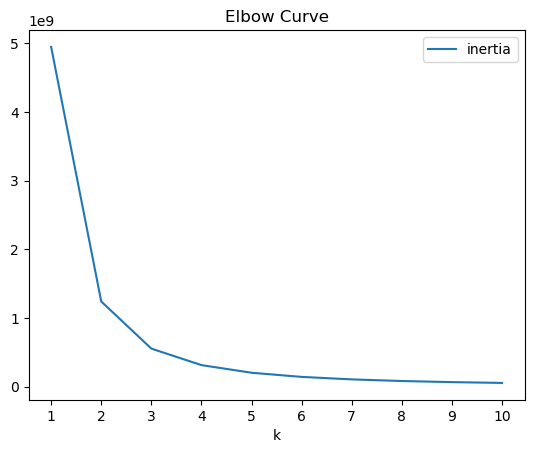

In [53]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [54]:
# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 74.92%
Percentage decrease from k=2 to k=3: 55.32%
Percentage decrease from k=3 to k=4: 43.34%
Percentage decrease from k=4 to k=5: 35.40%
Percentage decrease from k=5 to k=6: 29.78%
Percentage decrease from k=6 to k=7: 25.54%
Percentage decrease from k=7 to k=8: 22.25%
Percentage decrease from k=8 to k=9: 19.62%
Percentage decrease from k=9 to k=10: 17.50%


In [63]:
# Define the model with 3 clusters
model = KMeans(n_clusters=12, n_init='auto', random_state=1)

# Fit the model
model.fit(consumer_df)

# Make predictions
k_3 = model.predict(consumer_df)

# Create a copy of the DataFrame
customers_predictions_df = consumer_df.copy()

# Add a class column with the labels
customers_predictions_df['customer_segment'] = k_3

In [64]:
# Review the DataFrame
customers_predictions_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,customer_segment
0,1,55,1,3,1,53,17,3,8,3,3.1,1,5,1,1,14,5,4,7
1,2,19,1,23,1,64,19,3,13,3,3.1,1,5,1,1,2,3,4,7
2,3,50,1,12,1,73,21,1,13,4,3.1,1,2,1,1,23,2,1,7
3,4,21,1,15,2,90,39,2,13,4,3.5,1,3,1,1,49,6,1,7
4,5,45,1,3,1,49,37,2,0,4,2.7,1,2,1,1,31,6,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,2,10,1,28,46,3,0,2,4.2,2,6,2,2,32,5,1,10
3896,3897,52,2,1,4,49,15,3,24,4,4.5,2,1,2,2,41,4,6,10
3897,3898,46,2,2,4,33,30,3,9,4,2.9,2,4,2,2,24,5,2,10
3898,3899,44,2,18,2,77,23,1,4,2,3.8,2,5,2,2,24,5,1,10


<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=3'}, xlabel='Purchase Amount (USD)', ylabel='Previous Purchases'>

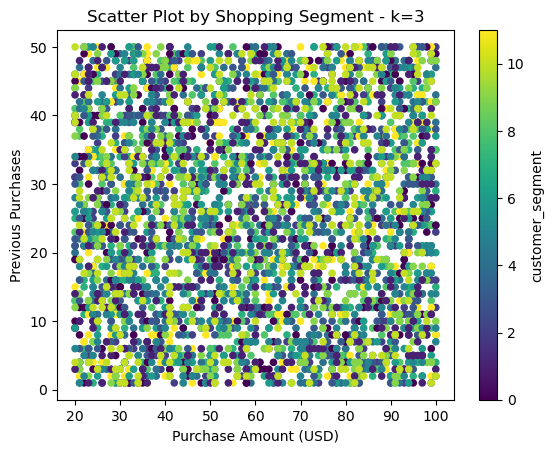

In [65]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=4 segments
customers_predictions_df.plot.scatter(
    x="Purchase Amount (USD)", 
    y="Previous Purchases", 
    c="customer_segment",
    title = "Scatter Plot by Shopping Segment - k=3",
    colormap='viridis'
)